In [34]:
# Student Score Prediction

In [1]:
import pandas as pd 
import numpy as np 

In [7]:
df = pd.read_csv("student_performance_dataset.csv")

In [35]:
# See tha summary statistics of data 

In [8]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [36]:
# See top 5 data

In [9]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [13]:
!pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.2 MB/s eta 0:00:004.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 5.3 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [15]:
# Scale Study_Hours_per_Week to same range as scores (50-100)
max_hours = df['Study_Hours_per_Week'].max()
df['Study_Hours_Scaled'] = df['Study_Hours_per_Week'] / max_hours * 100

# Internal Marks (weighted combination)
df['Internal_Marks'] = 0.6 * df['Past_Exam_Scores'] + 0.4 * df['Study_Hours_Scaled']


In [16]:
df['Assignment_Submission_Rate'] = df['Study_Hours_Scaled']  # 0-100%


In [17]:
df['Internal_Assessment_Marks'] = 0.5 * df['Internal_Marks'] + 0.5 * df['Past_Exam_Scores']


In [18]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Encode Parental Education Level
edu_mapping = {'High School': 0, 'Bachelors': 1, 'Masters': 2, 'PhD': 3}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_mapping)

# Encode Internet Access and Extracurricular Activities
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'No': 0, 'Yes': 1})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

# Encode Pass/Fail if needed
df['Pass_Fail'] = df['Pass_Fail'].map({'Fail': 0, 'Pass': 1})


In [19]:
scaler = MinMaxScaler()

numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
                'Internal_Marks', 'Assignment_Submission_Rate', 'Internal_Assessment_Marks']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [37]:
features = ['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
            'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities',
            'Internal_Marks', 'Assignment_Submission_Rate', 'Internal_Assessment_Marks']

X = df[features]
y = df['Final_Exam_Score']  # Regression target




In [38]:
print(X.head())
print(y.head())

   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       0              0.724138         0.364105              0.72   
1       0              0.206897         0.563803              0.46   
2       1              0.379310         0.750403              0.48   
3       1              0.586207         0.841704              0.98   
4       1              0.931034         0.973678              0.26   

   Parental_Education_Level  Internet_Access_at_Home  \
0                         0                        1   
1                         3                        0   
2                         3                        1   
3                         1                        0   
4                         2                        0   

   Extracurricular_Activities  Internal_Marks  Assignment_Submission_Rate  \
0                           1        0.731354                    0.724138   
1                           0        0.327043                    0.206897   
2          

In [39]:
# Visualizing the data

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [23]:
sns.set(style="whitegrid")
%matplotlib inline

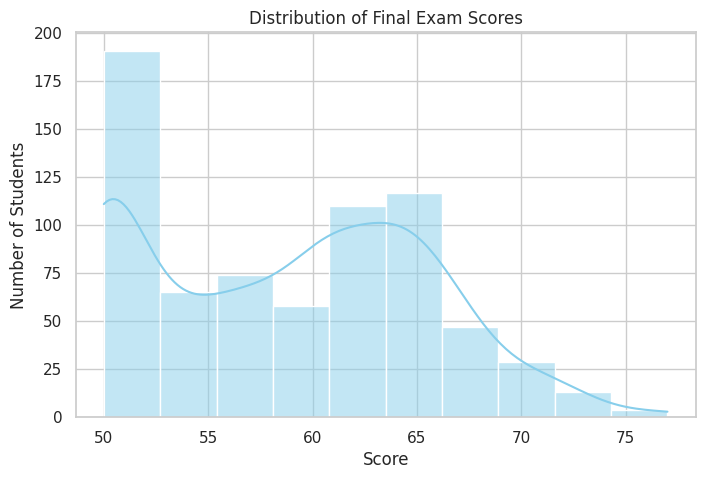

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Final_Exam_Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()


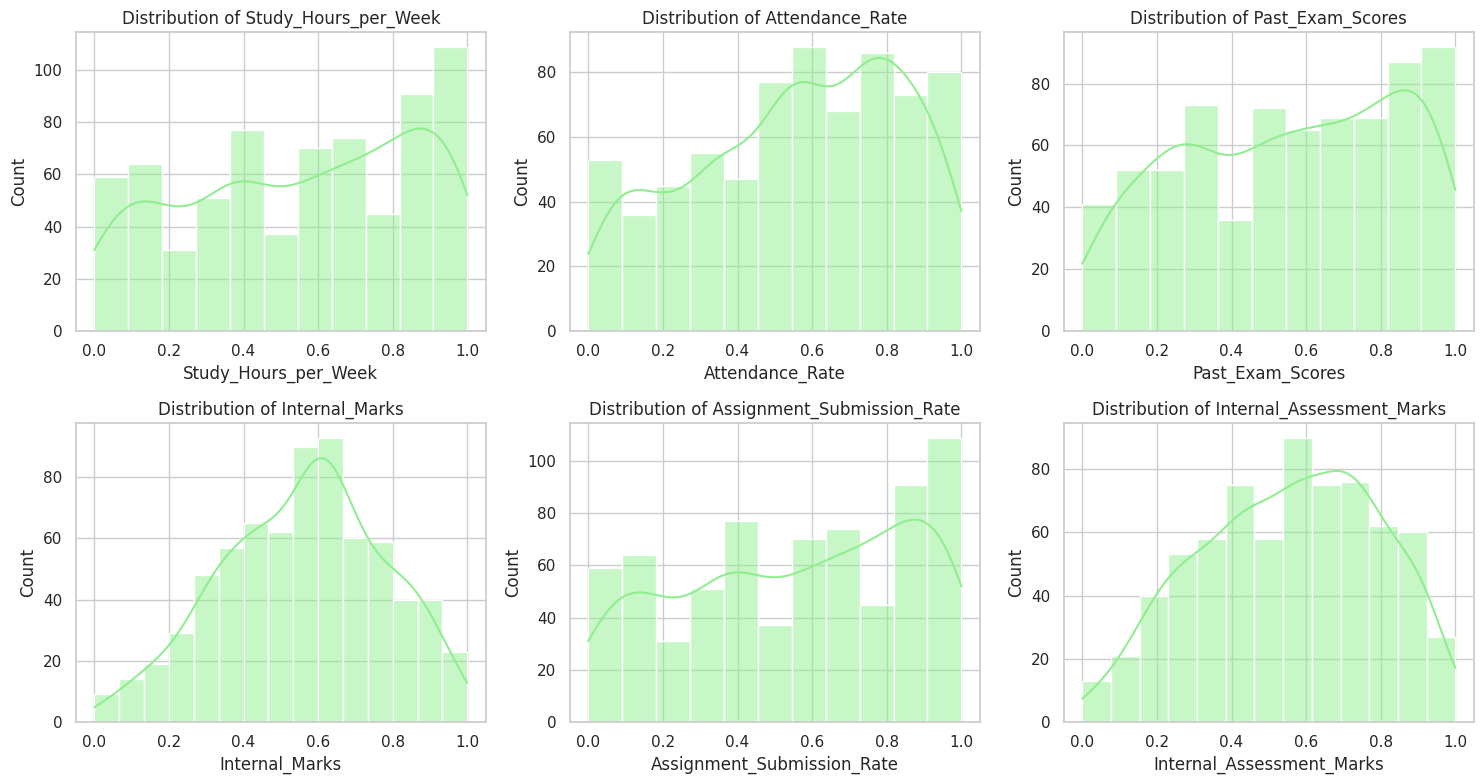

In [25]:
numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
                'Internal_Marks', 'Assignment_Submission_Rate', 'Internal_Assessment_Marks']

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='lightgreen')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


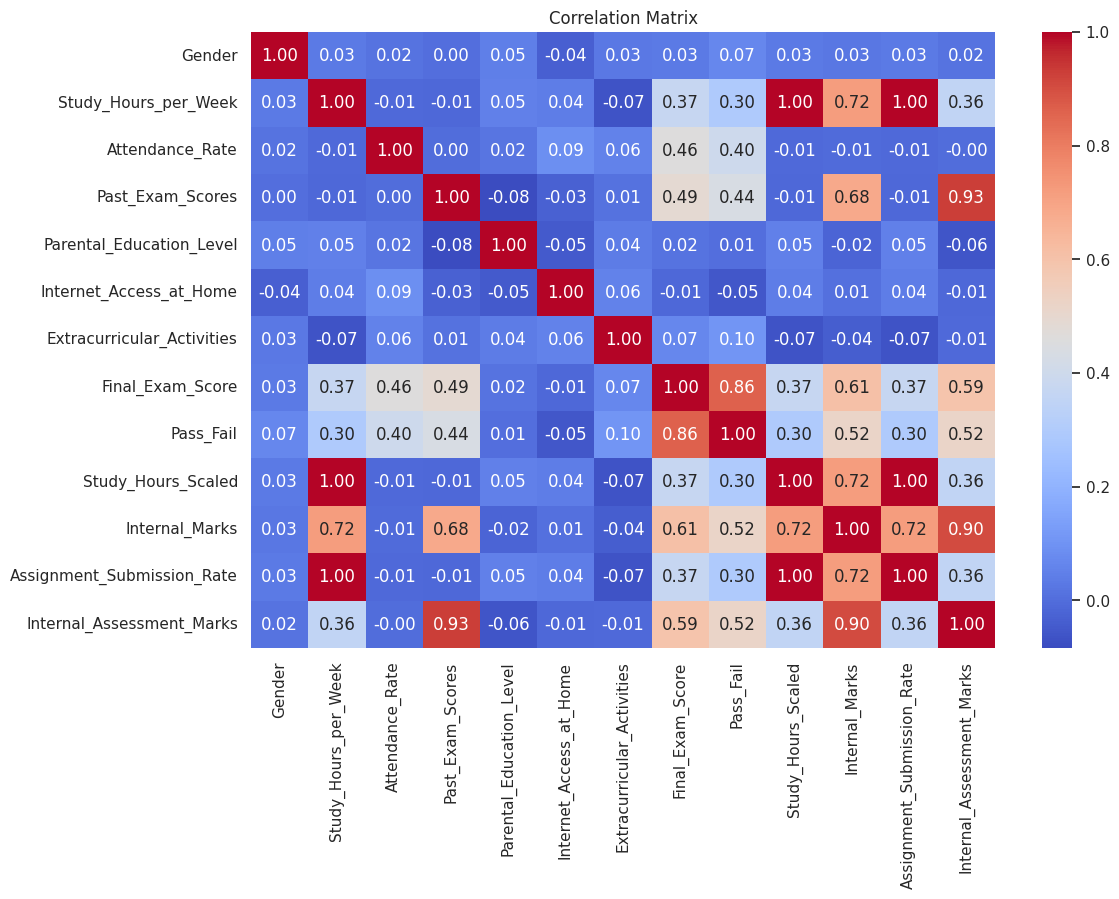

In [40]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()



plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



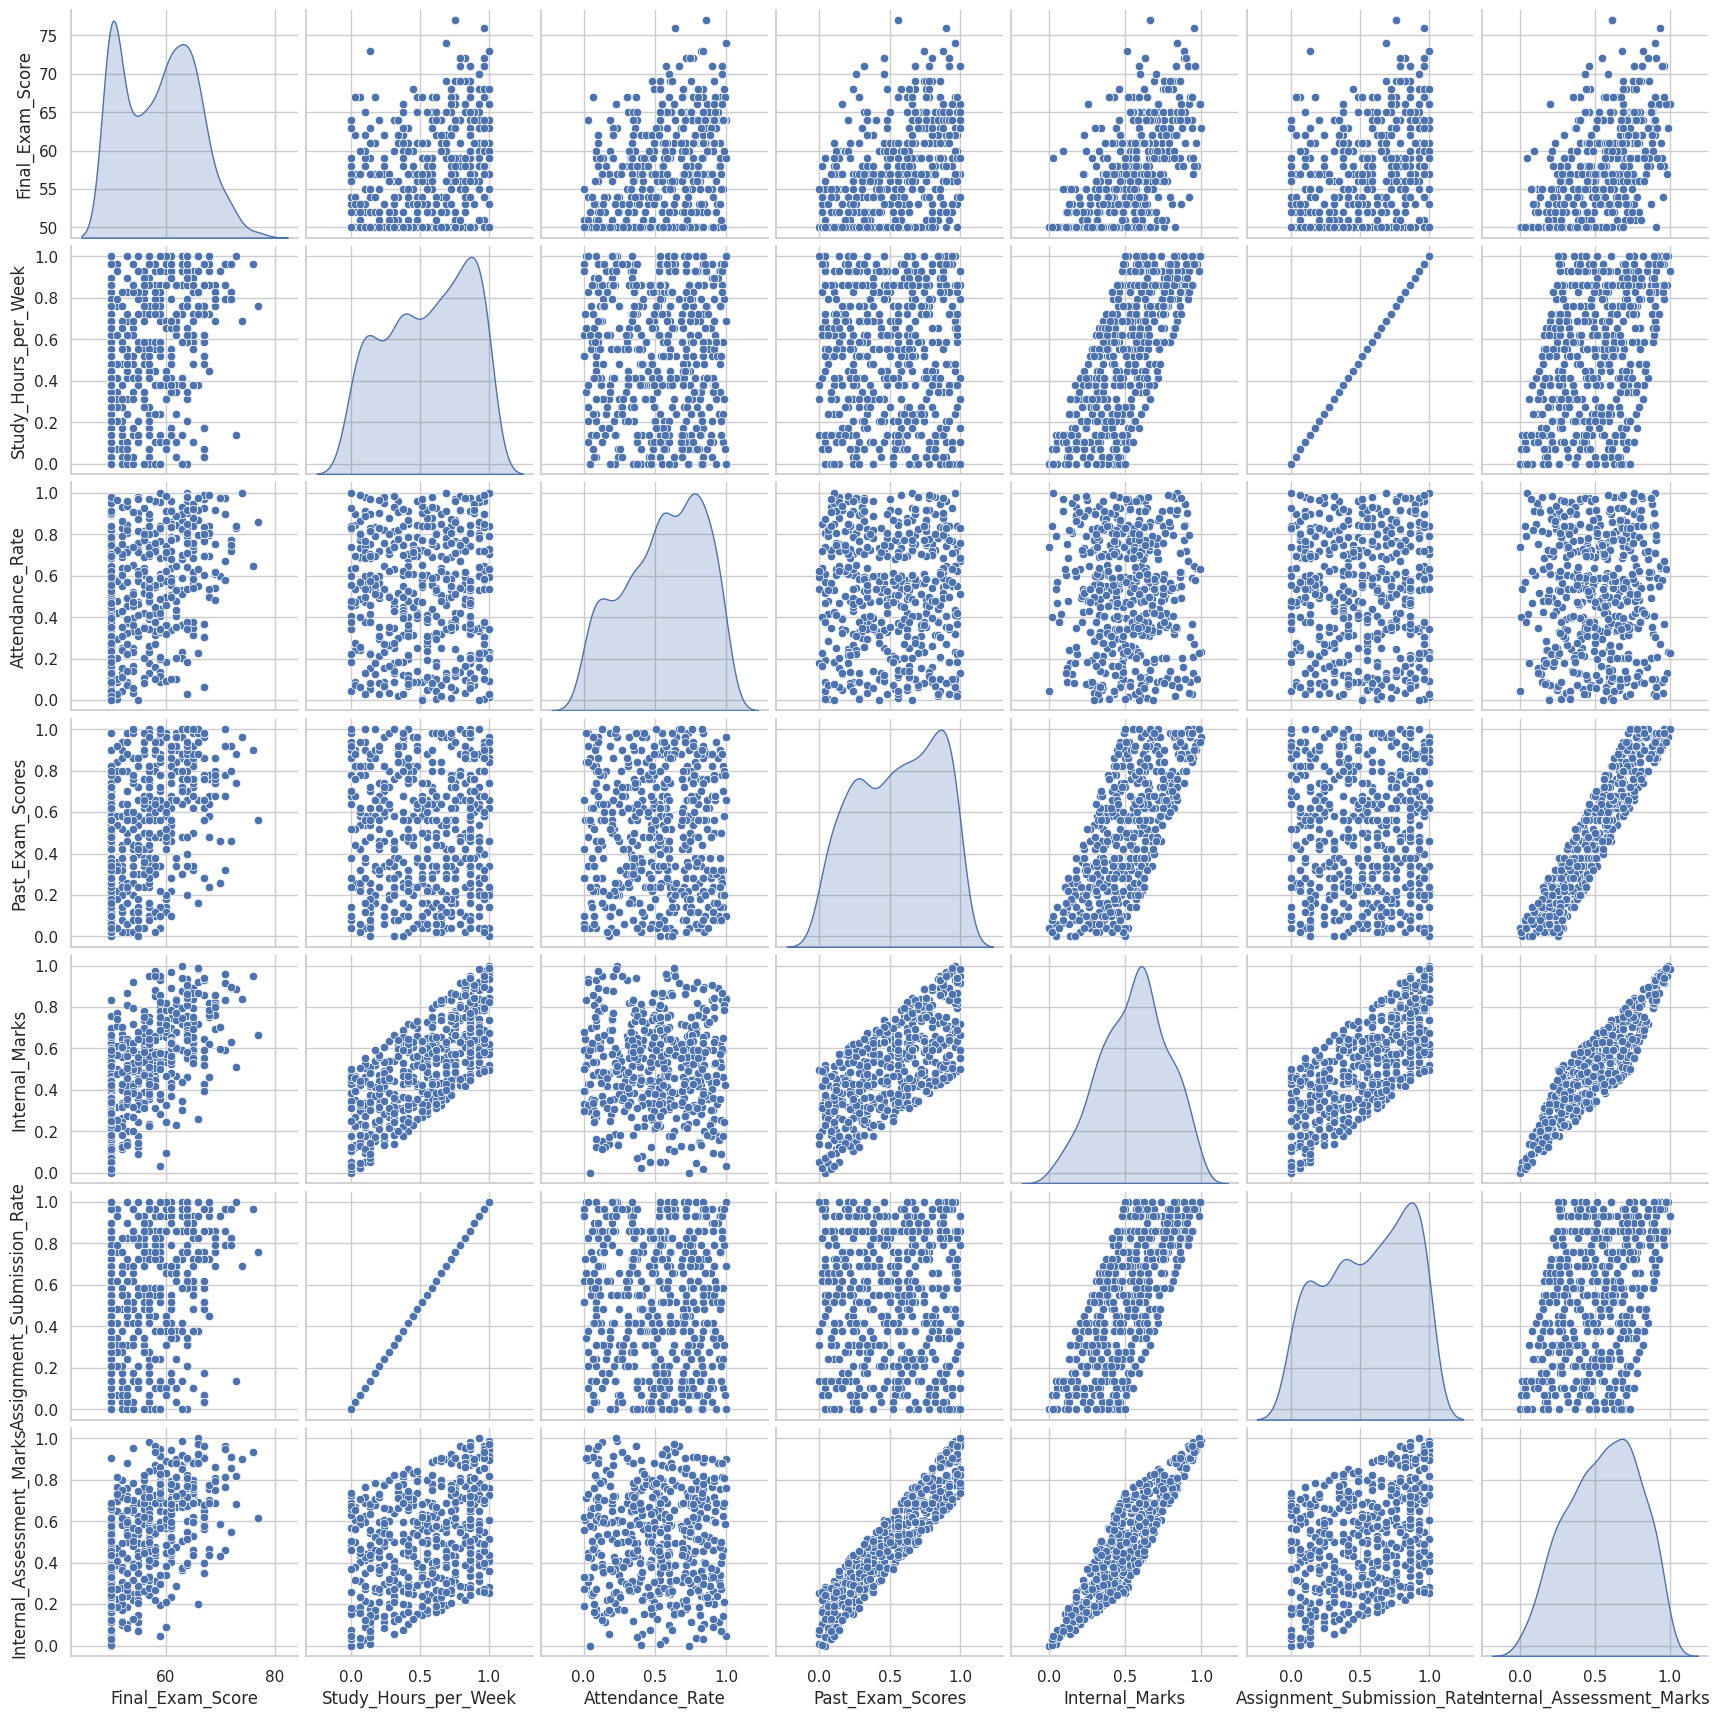

In [28]:
sns.pairplot(df[['Final_Exam_Score'] + numeric_cols], kind='scatter', diag_kind='kde')
plt.show()


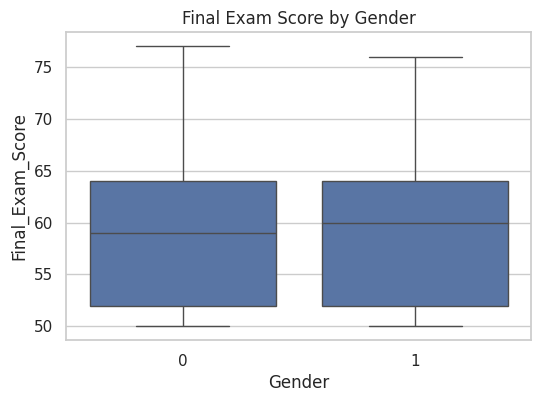

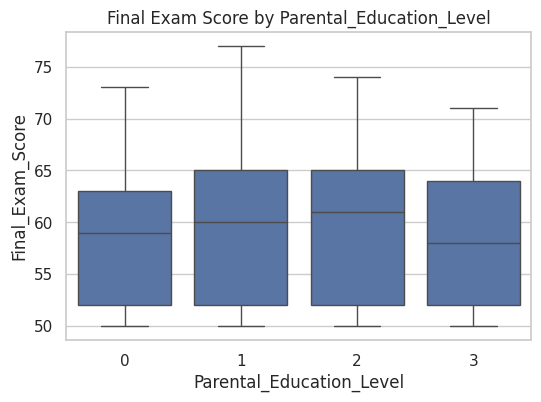

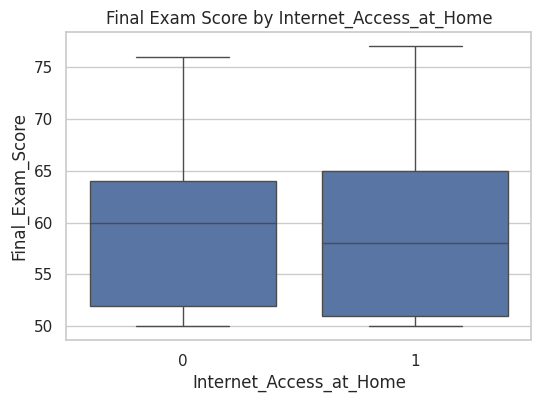

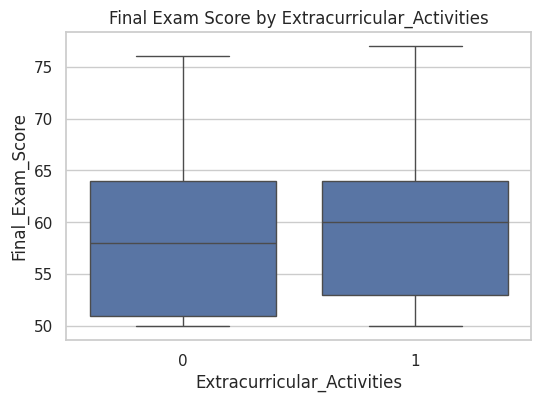

In [29]:
categorical_cols = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['Final_Exam_Score'])
    plt.title(f'Final Exam Score by {col}')
    plt.show()


In [41]:
df.dtypes


Student_ID                     object
Gender                          int64
Study_Hours_per_Week          float64
Attendance_Rate               float64
Past_Exam_Scores              float64
Parental_Education_Level        int64
Internet_Access_at_Home         int64
Extracurricular_Activities      int64
Final_Exam_Score                int64
Pass_Fail                       int64
Study_Hours_Scaled            float64
Internal_Marks                float64
Assignment_Submission_Rate    float64
Internal_Assessment_Marks     float64
dtype: object

In [47]:
features = ['Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
            'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home',
            'Extracurricular_Activities', 'Internal_Marks',
            'Assignment_Submission_Rate', 'Internal_Assessment_Marks']

X = df[features]
y = df['Final_Exam_Score']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-08-29 18:05:46.003307: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-29 18:05:46.003662: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-29 18:05:46.052117: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-29 18:05:47.756887: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [49]:

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8)


Epoch 1/100


/home/prejan/Programming/Python/Project/SMS-Project/score_prediction/scoreenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-29 18:08:18.692394: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3230.9814 - mae: 56.4095 - val_loss: 2668.7280 - val_mae: 51.3038
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1587.0068 - mae: 37.8900 - val_loss: 387.9378 - val_mae: 17.5041
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177.9944 - mae: 10.8790 - val_loss: 148.8424 - val_mae: 10.0527
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123.7626 - mae: 8.9646 - val_loss: 125.8788 - val_mae: 9.3376
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.6170 - mae: 8.1613 - val_loss: 102.5968 - val_mae: 8.2479
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87.3715 - mae: 7.5603 - val_loss: 87.0567 - val_mae: 7.6632
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.1273 - mae: 7.0391 - val_loss: 74.5053 - val_mae: 7.2006
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.4946 - mae: 6.5654 - val_loss: 65.2991 - val_mae: 6.7618
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s

In [51]:
# Predict final exam scores for test data
y_pred_nn = nn_model.predict(X_test)

# Convert predictions from 2D array to 1D
y_pred_nn = y_pred_nn.flatten()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE manually
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Neural Network RMSE: {rmse_nn:.2f}")



Neural Network RMSE: 3.69


In [56]:

from sklearn.metrics import r2_score

r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network R²: {r2_nn:.2f}")


Neural Network R²: 0.68


In [57]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Study_Hours_Scaled,Internal_Marks,Assignment_Submission_Rate,Internal_Assessment_Marks
0,S147,0,0.724138,0.364105,0.72,0,1,1,63,1,79.487179,0.731354,0.724138,0.726737
1,S136,0,0.206897,0.563803,0.46,3,0,0,50,0,41.025641,0.327043,0.206897,0.380448
2,S209,1,0.379310,0.750403,0.48,3,1,0,55,0,53.846154,0.426936,0.379310,0.444837
3,S458,1,0.586207,0.841704,0.98,1,0,0,65,1,69.230769,0.795833,0.586207,0.886533
4,S078,1,0.931034,0.973678,0.26,2,0,1,70,1,94.871795,0.598015,0.931034,0.433451


In [58]:
new_data = pd.DataFrame({
    'Gender': [0, 0, 1, 1, 1],
    'Study_Hours_per_Week': [0.724138, 0.206897, 0.379310, 0.586207, 0.931034],
    'Attendance_Rate': [0.364105, 0.563803, 0.750403, 0.841704, 0.973678],
    'Past_Exam_Scores': [0.72, 0.46, 0.48, 0.98, 0.26],
    'Parental_Education_Level': [0, 3, 3, 1, 2],
    'Internet_Access_at_Home': [1, 0, 1, 0, 0],
    'Extracurricular_Activities': [1, 0, 0, 0, 1],
    'Internal_Marks': [0.731354, 0.327043, 0.426936, 0.795833, 0.598015],
    'Assignment_Submission_Rate': [0.724138, 0.206897, 0.379310, 0.586207, 0.931034],
    'Internal_Assessment_Marks': [0.726737, 0.380448, 0.444837, 0.886533, 0.433451]
})

features = ['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
            'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities',
            'Internal_Marks', 'Assignment_Submission_Rate', 'Internal_Assessment_Marks']

X_new = new_data[features]

In [59]:
# Predict scores
y_pred_new = nn_model.predict(X_new)
y_pred_new = y_pred_new.flatten()  # Convert to 1D array

# Show predictions
new_data['Predicted_Final_Exam_Score'] = y_pred_new
print(new_data[['Predicted_Final_Exam_Score']])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
   Predicted_Final_Exam_Score
0                   60.668537
1                   54.302696
2                   57.246700
3                   68.120720
4                   64.421082


In [60]:
new_data['Predicted_Final_Exam_Score'] = new_data['Predicted_Final_Exam_Score'].round().astype(int)
print(new_data[['Predicted_Final_Exam_Score']])


   Predicted_Final_Exam_Score
0                          61
1                          54
2                          57
3                          68
4                          64


In [61]:
# Predict final exam scores for X_test
y_pred_nn = nn_model.predict(X_test).flatten()  # Convert to 1D array


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [63]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_nn)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_nn)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred_nn)

print(f"Neural Network Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Neural Network Evaluation on Test Set:
MAE: 2.86
MSE: 13.61
RMSE: 3.69
R² Score: 0.68


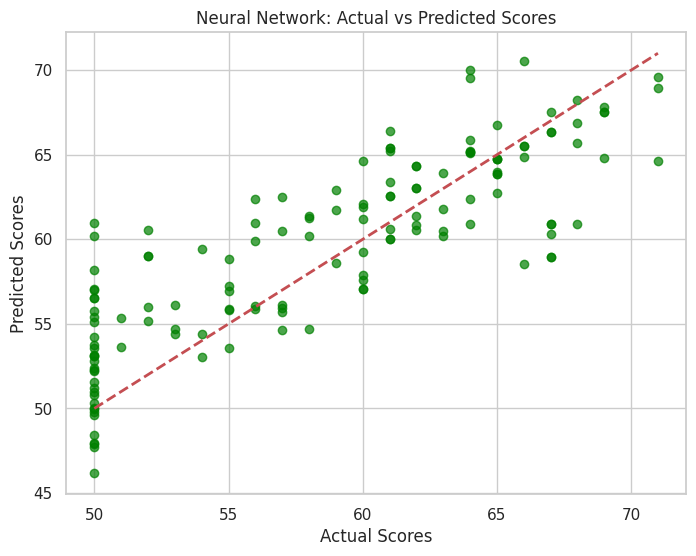

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_nn, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Neural Network: Actual vs Predicted Scores')
plt.show()


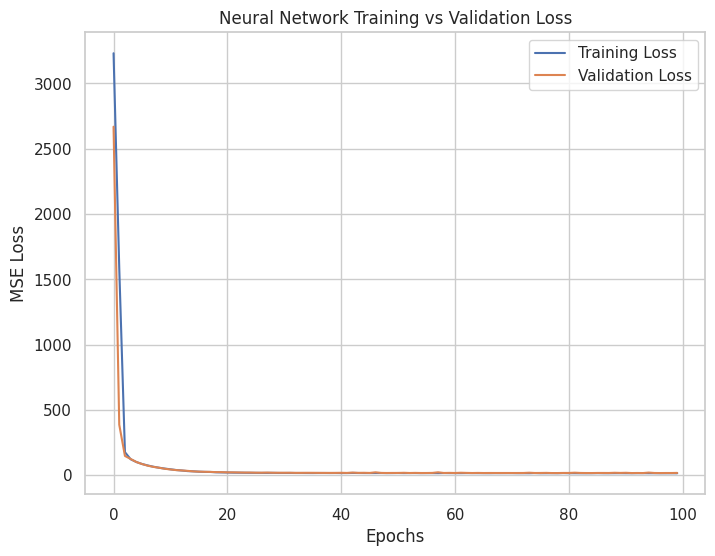

In [65]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Neural Network Training vs Validation Loss')
plt.legend()
plt.show()
